# Words-per Minute

We will do an **experiment** to see how much faster or slower, do we type when we do **blind typing**.

1. We will test our typing with the lights on
2. Then, we'll test again with the lights off

Our **Hypothesis** is that: "people type slower when the lights are off". Is this true? let's find out.

### Data Collection

- Experiment subjects will visit the website: https://monkeytype.com/ to undergo the typing test.
- Each subject will report their own score. Which we will store down below.

### Data Loading

We will use regular Python lists to store the measurements before and after the intervention.

In [ ]:
# Experiment Data
scores_1 = [33, 46, 35, 28, 20, 22, 19, 25, 19, 67, 23, 19, 40, 18, 27, 44]
scores_2 = [46, 23, 36, 21, 38, 23, 22, 27, 28, 37, 37, 26, 33, 53, 9, 13]

### Verification

We expect the same participants to undergo the experiment once with the lights on and once with the lights out. 

In [ ]:
# Quick Check
assert len(scores_1) == len(scores_2)

### Transformation

In [83]:
# Concatenate
scores = scores_1 + scores_2
scores[:10]

[33, 46, 35, 28, 20, 22, 19, 25, 19, 67]

### Analysis

In [69]:
def my_sum(data):
    s = 0
    for i in scores:
        s += i
    return s

my_sum(scores)

957

In [70]:
def my_average(data):
    return my_sum(data) / len(scores)

my_average(scores)

29.90625

In [71]:
def my_median(data):
    mid_index = len(scores) // 2
    return sorted(data)[mid_index]

my_median(scores)

27

### Enter: `pandas.Series`

In [62]:
import pandas as pd

s = pd.Series(scores, name="wpm")
s[:10]

0    33
1    46
2    35
3    28
4    20
5    22
6    19
7    25
8    19
9    67
Name: wpm, dtype: int64

Statistics:

In [77]:
print("Number of items:", len(s))
print("Sum:", s.sum())
print("Average:", s.mean())
print("Median:", s.median(),)
print("Mode:", s.mode()[0])

Number of items: 32
Sum: 957
Average: 29.90625
Median: 27.0
Mode: 19


In [54]:
# Standard Deviation
s.std()

np.float64(12.32191694083247)

### Enter: `pandas.DataFrame`

In [85]:
df = pd.DataFrame({
    "wpm": scores_1 + scores_2,
    "intervention": [False] * len(scores_1) + [True] * len(scores_2)
})

In [86]:
df.head()

,wpm,intervention
0,33,False
1,46,False
2,35,False
3,28,False
4,20,False


In [87]:
df.tail()

,wpm,intervention
27,26,True
28,33,True
29,53,True
30,9,True
31,13,True


### Overall statistics

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wpm,32.0,29.90625,12.321917,9.0,21.75,27.0,37.0,67.0


### Statistics by group

In [89]:
df.groupby(by='intervention').describe()

wpm                                                    
             count     mean        std   min    25%   50%    75%   max
intervention                                                          
False         16.0  30.3125  13.444795  18.0  19.75  26.0  36.25  67.0
True          16.0  29.5000  11.518102   9.0  22.75  27.5  37.00  53.0

### Visualization: `Seaborn`

<Axes: xlabel='intervention', ylabel='wpm'>

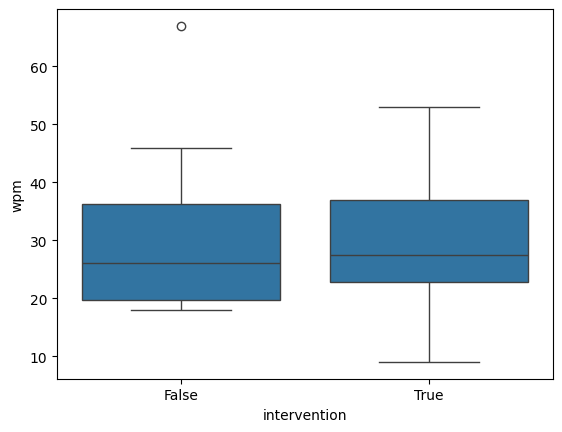

In [99]:
import seaborn as sns

sns.boxplot(
    data=df,
    y='wpm',
    x='intervention'
)

### Conclusion